In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random

In [21]:
np.linspace(-1,1,5)

array([-1. , -0.5,  0. ,  0.5,  1. ])

### Random Data Initialization

In [13]:
x1, x2 = np.random.choice(np.linspace(-1,1,2000),1500), np.random.choice(np.linspace(-1,1,2000),1500) # initialization
data_dictionary = {'x1':x1,'x2':x2,'y':np.zeros(1500,dtype='int32')} # creating dictionary
data = pd.DataFrame(data_dictionary) # converting it to pandas dataframe object
data

,x1,x2,y
0,-0.330665,0.439720,0
1,-0.758879,-0.104552,0
2,-0.132566,-0.722861,0
3,-0.498749,0.593797,0
4,0.469735,0.323662,0
...,...,...,...
1495,0.052526,-0.937969,0
1496,-0.594797,-0.700850,0
1497,0.849925,0.680840,0
1498,0.202601,0.547774,0


In [28]:
x_filter = ((data['x1'] > 0) & (data['x2'] > 0)) | ((data['x1'] < 0) & (data['x2'] < 0)) # main filter
data_1 = data[x_filter]
data_1

,x1,x2,y
1,-0.758879,-0.104552,0
2,-0.132566,-0.722861,0
4,0.469735,0.323662,0
6,0.598799,0.326663,0
9,-0.956978,-0.086543,0
...,...,...,...
1488,-0.063532,-0.898949,0
1490,0.707854,0.240620,0
1496,-0.594797,-0.700850,0
1497,0.849925,0.680840,0


### Applying Filtering

In [16]:
x_filter = (  (data['x1'] > 0) & (data['x2'] > 0)  ) | (  (data['x1'] < 0) & (data['x2'] < 0)  ) # main filter
data_1 = data[x_filter] # applying filter in order to obtain similar points and name them data_1
data_2, data_2['y'] = data[~x_filter], 1 # doing the same but the opposite points and naming them data_2

### Combining Datas and Converting it back to pd.DataFrame object

In [18]:
final_data = np.vstack( (data_1,data_2) ) # combine both dataframes together as a final frame
final_data = pd.DataFrame({'x1':final_data[:,0],'x2':final_data[:,1],'y':final_data[:,2]}) # converting it to pandas dataframe object

In [19]:
final_data # printing it

,x1,x2,y
0,-0.758879,-0.104552,0.0
1,-0.132566,-0.722861,0.0
2,0.469735,0.323662,0.0
3,0.598799,0.326663,0.0
4,-0.956978,-0.086543,0.0
...,...,...,...
1495,-0.100550,0.369685,1.0
1496,0.122561,-0.797899,1.0
1497,-0.878939,0.779890,1.0
1498,0.052526,-0.937969,1.0


### Plotting data

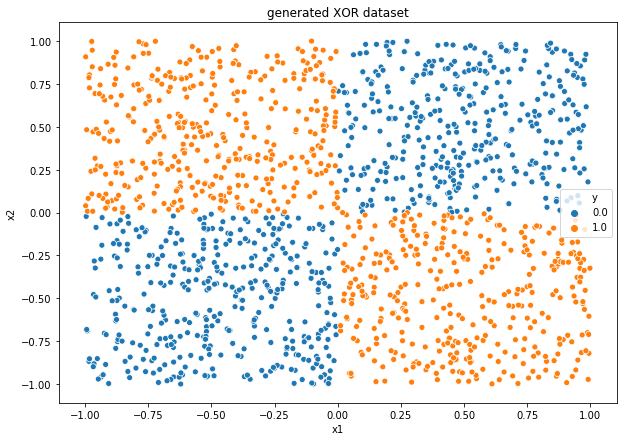

In [27]:
plt.figure(figsize =(10, 7)) # figure size
sns.scatterplot(final_data['x1'],final_data['x2'] ,hue = final_data['y']) # seaborn plot
plt.title("generated XOR dataset") # setting reasonable title
plt.show()